# 性格特性と心象の関係

In [19]:
import os 
import glob
import pickle 
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    SS_ternary, TS_ternary, sentiment, third_sentiment, persona, third_persona, text, audio,\
    visual, vid = pickle.load(f, encoding='utf-8')

def calc_p(df, index=0): 
    """
    p値の算出

    Args:
        df(DataFrame):説明

    """
    for i in range(len(df.columns)):
        x = df.iloc[:, index].values 
        if i == index:
            continue
        y = df.iloc[:, i].values 
        a, b = pearsonr(np.ravel(x), np.ravel(y))
        if b <= 0.05:
            print("=" * 45)
            print(f"--{df.columns[i]}--")
            print("相関係数:", a.round(4))
            print("p値:", b.round(4))
            print("=" * 45)



def calc_appearance_rate(X):
    """
    ユーザごとの低群、中群、高群の出現率を計算する

    Args:
        X():説明

    Returns:
        negative():説明
        neutral():説明
        positive():説明

    """
    negative = []
    neutral = []
    positive = []

    for user, labels in X.items():
        neg = 0
        neu = 0 
        pos = 0
        tot = 0
        for label in labels:
            if label == 0.0:
                neg += 1
            elif label == 1.0:
                neu += 1
            else:
                pos += 1
            tot += 1

        negative.append(neg/tot)
        neutral.append(neu/tot)
        positive.append(pos/tot)
    
    return negative, neutral, positive
    

def calc_persona(X):
    """
    性格特性スコアをリスト化する

    Args:
        X():

    Returns:
        ext():
        agr():
        con():
        neu():
        ope():
        
    """
    ext = []
    agr = []
    con = []
    neu = []
    ope = []

    for _, labels in X.items():
        ext.append(labels[0])
        agr.append(labels[1])
        con.append(labels[2])
        neu.append(labels[3])
        ope.append(labels[4])

    return ext, agr, con, neu, ope

def calc_sentiment(X):
    """ 
    心象スコアをリスト化する

    Args:
        X():

    Returns:
        res():
    """ 
    res = []

    for scores in X.values():
        res.append(statistics.mean(scores))

    return res

In [8]:
# 本人アノテーションによる心象スコア（離散）
# negative, neutral, positive = calc_appearance_rate(SS_ternary)

# 第三者アノテーションによる心象スコア（離散）
third_neg, third_neu, third_pos = calc_appearance_rate(TS_ternary)

# 本人アノテーションによる心象スコア（連続）
# sentiment = calc_sentiment(sentiment)

# 第三者アノテーションによる心象スコア（連続）
third_sentiment = calc_sentiment(third_sentiment)

    
# 本人アノテーションによる性格特性スコア（連続）
# extraversion, agreauleness, conscientiousness, neuroticism, openness = calc_persona(persona)

# 第三者アノテーションによる性格特性スコア（連続）
third_extr, third_agre, third_cons, third_neur, third_open = calc_persona(third_persona)


AttributeError: 'list' object has no attribute 'values'

In [6]:
count = []
for id in vid:
    count.append(len(TS_ternary[id]))
count

[71,
 113,
 74,
 77,
 98,
 97,
 110,
 90,
 110,
 113,
 81,
 84,
 84,
 97,
 96,
 101,
 98,
 95,
 107,
 104,
 77,
 94,
 54,
 110,
 99,
 105]

### 心象（本人）と性格特性(本人）の相関

In [6]:
# 低群の出現割合と性格特性の相関
df1 = pd.DataFrame({"negative":negative,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----negative----')
print(df1.corr()['negative'])
calc_p(df1)

# 中群と性格特性の相関
df2 = pd.DataFrame({"neutral":neutral,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----neutral----')
print(df2.corr()['neutral'])
calc_p(df2)

# 高群と性格特性の相関
df3 = pd.DataFrame({"positive":positive,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----positive----')
print(df3.corr()['positive'])
calc_p(df3)

#　会話全体の心象スコアの平均と性格特性の相関
df4 = pd.DataFrame({"sentiment":sentiment,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----sentiment----')
# print(df4.corr()['sentiment'])
print(df4.corr())
calc_p(df4)

----negative----
                   negative  extraversion  agreauleness  conscientiousness  \
negative           1.000000      0.011969     -0.088520          -0.117347   
extraversion       0.011969      1.000000     -0.164812           0.325806   
agreauleness      -0.088520     -0.164812      1.000000           0.029440   
conscientiousness -0.117347      0.325806      0.029440           1.000000   
neuroticism        0.350044     -0.169338     -0.060717          -0.337590   
openness           0.203680      0.160088     -0.657664          -0.017963   

                   neuroticism  openness  
negative              0.350044  0.203680  
extraversion         -0.169338  0.160088  
agreauleness         -0.060717 -0.657664  
conscientiousness    -0.337590 -0.017963  
neuroticism           1.000000  0.087360  
openness              0.087360  1.000000  
----neutral----
                    neutral  extraversion  agreauleness  conscientiousness  \
neutral            1.000000      0.065122

### 心象（本人）と性格特性(第三者）の相関

In [ ]:
# 低群の出現率と性格特性の相関
df1 = pd.DataFrame({"negative":negative,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open})
print('----negative----')
print(df1.corr()['negative'])
calc_p(df1)

# 中群の出現率と性格特性の相関
df2 = pd.DataFrame({"neutral":neutral,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open})
print('----neutral----')
print(df2.corr()['neutral'])
calc_p(df2)

# 高群の出現率と性格特性の相関
df3 = pd.DataFrame({"positive":positive,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open})
print('----positive----')
print(df3.corr()['positive'])
calc_p(df3)

#　会話全体の心象スコアの平均と性格特性の相関
df4 = pd.DataFrame({"sentiment":sentiment,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open})
print('----sentiment----')
print(df4.corr()['sentiment'])
calc_p(df4)


### 心象（第三者）と性格特性(本人）の相関

In [ ]:
# 低群の出現割合と性格特性の相関
df1 = pd.DataFrame({"third_neg":third_neg,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----third_neg----')
print(df1.corr()['third_neg'])
calc_p(df1)

# 中群と性格特性の相関
df2 = pd.DataFrame({"third_neu":third_neu,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----third_neu----')
print(df2.corr()['third_neu'])
calc_p(df2)

# 高群と性格特性の相関
df3 = pd.DataFrame({"third_pos":third_pos,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----third_pos----')
print(df3.corr()['third_pos'])
calc_p(df3)

#　会話全体の心象スコアの平均と性格特性の相関
df4 = pd.DataFrame({"third_sentiment":third_sentiment,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----third_sentiment----')
print(df4.corr()['third_sentiment'])
calc_p(df4)

### 心象（第三者）と性格特性(第三者）の相関

In [23]:
acc = [0.676, 0.637, 0.676, 0.779, 0.714, 0.701, 0.573, 0.733, 0.682, 0.602, 0.827, 0.738, 0.762, 0.526, 0.604, 0.743, 0.724, 0.716, 0.701, 0.51, 0.883, 0.862, 0.87, 0.536, 0.434, 0.752]
# 低群の出現率と性格特性の相関
df1 = pd.DataFrame({"third_neg":third_neg,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open,
                   "utter_count": count,
                   "accuracy": acc})
print('----third_neg----')
print(df1.corr())
calc_p(df1, 7)

# 中群の出現率と性格特性の相関
df2 = pd.DataFrame({"third_neu":third_neu,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open,
                   "utter_count": count,
                   "accuracy": acc})
print('----third_neu----')
print(df2.corr())
calc_p(df2, 7)

# 高群の出現率と性格特性の相関
df3 = pd.DataFrame({"third_pos":third_pos,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open,
                   "utter_count": count,
                   "accuracy": acc})
print('----third_pos----')
print(df3.corr())
calc_p(df3, 7)

#　会話全体の心象スコアの平均と性格特性の相関
df4 = pd.DataFrame({"third_sentiment":third_sentiment,
                   "third_extr":third_extr,
                   "third_agre":third_agre,
                   "third_cons":third_cons,
                   "third_neur":third_neur,
                   "third_open":third_open,
                   "utter_count": count,
                   "accuracy": acc})
print('----third_sentiment----')
print(df4.corr())
calc_p(df4, 7)


----third_neg----
             third_neg  third_extr  third_agre  third_cons  third_neur  \
third_neg     1.000000   -0.299452   -0.379445   -0.276074    0.226542   
third_extr   -0.299452    1.000000    0.001318   -0.069909   -0.146399   
third_agre   -0.379445    0.001318    1.000000    0.438614   -0.327133   
third_cons   -0.276074   -0.069909    0.438614    1.000000   -0.719623   
third_neur    0.226542   -0.146399   -0.327133   -0.719623    1.000000   
third_open   -0.606646    0.575051    0.211240    0.284352   -0.411879   
utter_count   0.328758    0.088993   -0.417681   -0.180797   -0.084957   
accuracy     -0.772879    0.111950    0.357851    0.370587   -0.338897   

             third_open  utter_count  accuracy  
third_neg     -0.606646     0.328758 -0.772879  
third_extr     0.575051     0.088993  0.111950  
third_agre     0.211240    -0.417681  0.357851  
third_cons     0.284352    -0.180797  0.370587  
third_neur    -0.411879    -0.084957 -0.338897  
third_open     1.0000

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

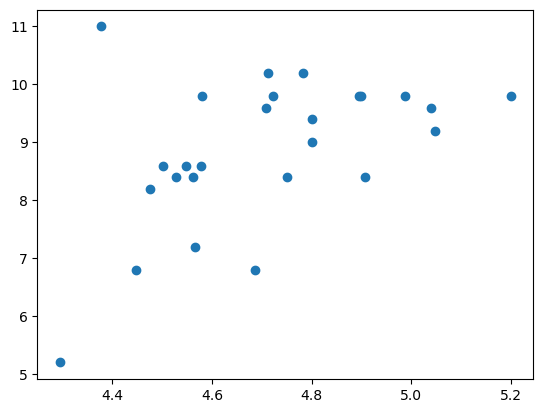

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.scatter(third_sentiment, third_open)